**Digit Recognization** - AI Mini project

> By - **YASH GUPTA**



---



Importing the important libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Loading the MNIST dataset

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

Previewing an example

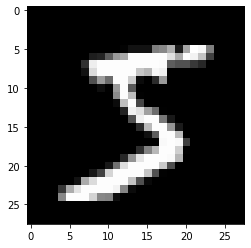

In [3]:
plt.imshow(X_train[0],cmap='gray')

This digit is

In [4]:
y_train[0]

5

Checking size of our ndarrays

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [7]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

Normalizing the dataset

In [8]:
X_train = X_train/255
X_test = X_test/255

Number of neuron units for hidden layer

In [9]:
(28*28)/2

392.0

Creating the ANN model

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(392,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

Compiling the model

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fitting the train set in model

In [12]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2104 - accuracy: 0.9375
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0832 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0548 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0397 - accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9949
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.009

Predicting the values for X_test

In [13]:
y_pred = np.argmax(model.predict(X_test),axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Real test set

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Checking the accuracy of the model

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9818

Confusion matrix of the model

In [16]:
confusion_matrix(y_test,y_pred)

array([[ 962,    1,    2,    1,    2,    1,    2,    1,    2,    6],
       [   0, 1127,    2,    1,    0,    1,    2,    0,    1,    1],
       [   3,    2, 1011,    4,    1,    0,    1,    3,    7,    0],
       [   0,    0,    3,  997,    0,    2,    0,    0,    2,    6],
       [   0,    0,    3,    0,  969,    0,    4,    1,    0,    5],
       [   3,    0,    0,   11,    1,  871,    4,    0,    1,    1],
       [   1,    2,    1,    1,    7,    2,  944,    0,    0,    0],
       [   0,    4,   10,    4,    1,    0,    0,  996,    4,    9],
       [   0,    0,    4,    6,    5,    5,    1,    2,  947,    4],
       [   0,    3,    0,    1,    9,    1,    0,    0,    1,  994]])

Saving the model

In [17]:
model.save('Digit_recong.h5')